In [1]:
import json
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# getting data from json
# all
with open("./unlensed_params_BNS_Alsing_1M.json") as f:
    unlensed_params = json.load(f)
with open("./lensed_params_BNS_Alsing_1M.json") as f:
    lensed_params = json.load(f)
# detectable
with open("./unlensed_params_detectable_BNS_Alsing_1M.json") as f:
    unlensed_params_detectable = json.load(f)
with open("./lensed_params_detectable_BNS_Alsing_1M.json") as f:
    lensed_params_detectable = json.load(f)

In [3]:
# KDE plot Detectable+Undetectable for redshift distribution
# all
kde_unlensed = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(unlensed_params['zs']).reshape(-1,1))
kde_lensed = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(lensed_params['zs']).reshape(-1,1))
kde_lenses = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(lensed_params['zl']).reshape(-1,1))
# detectable
kde_unlensed_detectable = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(unlensed_params_detectable['zs']).reshape(-1,1))
kde_lensed_detectable = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(lensed_params_detectable['zs']).reshape(-1,1))
kde_lenses_detectable = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(lensed_params_detectable['zl']).reshape(-1,1))

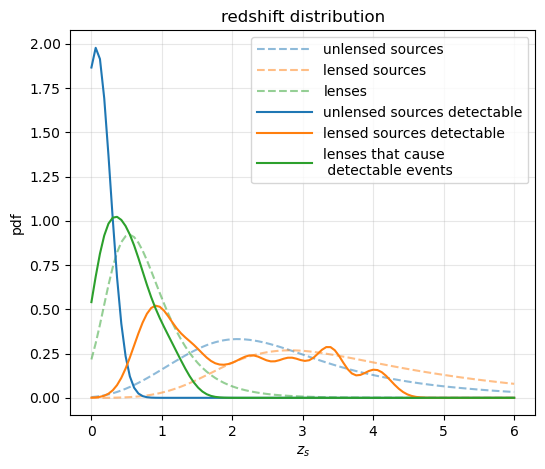

In [6]:
# plot
plt.figure(figsize=(6,5))
zs = np.linspace(0,6,100)
# all
plt.plot(zs, np.exp(kde_unlensed.score_samples(zs.reshape(-1,1))), label='unlensed sources', color='C0', linestyle='--', alpha=0.5)
plt.plot(zs, np.exp(kde_lensed.score_samples(zs.reshape(-1,1))), label='lensed sources', color='C1', linestyle='--', alpha=0.5)
plt.plot(zs, np.exp(kde_lenses.score_samples(zs.reshape(-1,1))), label='lenses', color='C2', linestyle='--', alpha=0.5)
# detectable
plt.plot(zs, np.exp(kde_unlensed_detectable.score_samples(zs.reshape(-1,1))), label='unlensed sources detectable', color='C0', linestyle='-')
plt.plot(zs, np.exp(kde_lensed_detectable.score_samples(zs.reshape(-1,1))), label='lensed sources detectable', color='C1', linestyle='-')
plt.plot(zs, np.exp(kde_lenses_detectable.score_samples(zs.reshape(-1,1))), label='lenses that cause \n detectable events', color='C2', linestyle='-')
plt.xlabel(r'$z_s$')
plt.ylabel('pdf')
leg = plt.legend(handlelength=4)
leg.get_lines()[0].set_linewidth(1.5)
leg.get_lines()[1].set_linewidth(1.5)
leg.get_lines()[2].set_linewidth(1.5)
leg.get_lines()[3].set_linewidth(1.5)
leg.get_lines()[4].set_linewidth(1.5)
leg.get_lines()[5].set_linewidth(1.5)
plt.grid(alpha=0.3)
plt.title('redshift distribution')
plt.savefig("redshift_distribution_conf1.png")